# Buffer Stock Model

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt

# load the model module
from MPCFModel import MPCFClass
import figs

**Create figs/**

In [2]:
if not os.path.isdir('figs'): os.mkdir('figs')

**Choos number of threads:**

In [3]:
import numba as nb
nb.set_num_threads(8)

# Setup

In [4]:
LOAD = False
LOAD_PF = LOAD
LOAD_PERS = LOAD
LOAD_RHO = LOAD
LOAD_BETA = LOAD
LOAD_ANNUAL = LOAD
LOAD_SIGMA_XI = LOAD

# Baseline

In [5]:
def do_model(name,LOAD,postfix='',par={}):

    # a. setup
    model = MPCFClass(name=name,load=LOAD,par=par)

    if not LOAD:

        # b. solve
        model.solve()

        # c. save
        model.save()
        
    # b. cfuncs, MPC and MPCF
    figs.cfunc(model,postfix=postfix,savefig=True)
    figs.MPC(model,postfix=postfix,savefig=True)
    figs.MPCF(model,postfix=postfix,savefig=True)

    # c. simulation
    figs.simulate(model,postfix=postfix,savefig=True)

    return model    

solving model with Ndelta=1 and Ntau=1

  50: max_abs_diff =   0.04762616 (elapsed:   4.3 secs)
 100: max_abs_diff =   0.02182319 (elapsed:   4.4 secs)
 150: max_abs_diff =   0.01420401 (elapsed:   4.6 secs)
 200: max_abs_diff =   0.01044717 (elapsed:   4.7 secs)
 250: max_abs_diff =   0.00820666 (elapsed:   4.8 secs)
 300: max_abs_diff =   0.00671940 (elapsed:   5.0 secs)
 350: max_abs_diff =   0.00566087 (elapsed:   5.1 secs)
 400: max_abs_diff =   0.00486952 (elapsed:   5.3 secs)
 450: max_abs_diff =   0.00425595 (elapsed:   5.4 secs)
 500: max_abs_diff =   0.00376643 (elapsed:   5.5 secs)
 550: max_abs_diff =   0.00336687 (elapsed:   5.7 secs)
 600: max_abs_diff =   0.00303459 (elapsed:   5.8 secs)
 650: max_abs_diff =   0.00275390 (elapsed:   6.0 secs)
 700: max_abs_diff =   0.00251366 (elapsed:   6.1 secs)
 750: max_abs_diff =   0.00230570 (elapsed:   6.2 secs)
 800: max_abs_diff =   0.00212391 (elapsed:   6.4 secs)
 850: max_abs_diff =   0.00196363 (elapsed:   6.5 secs)
 900: ma

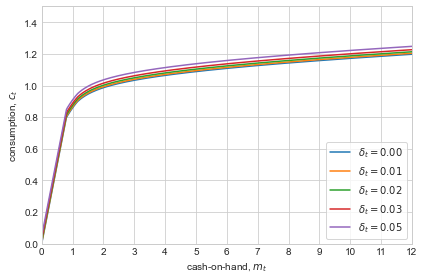

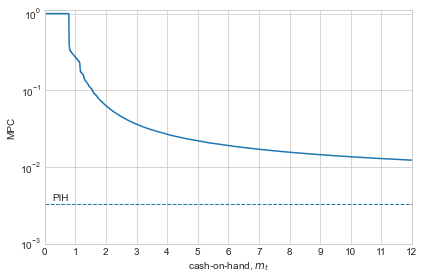

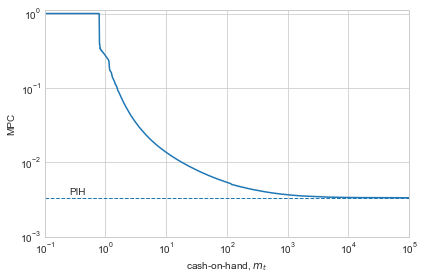

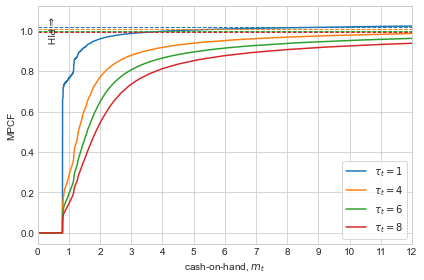

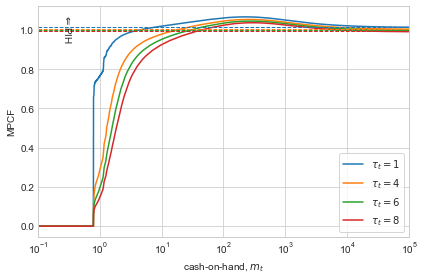

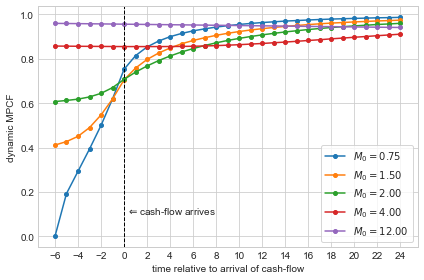

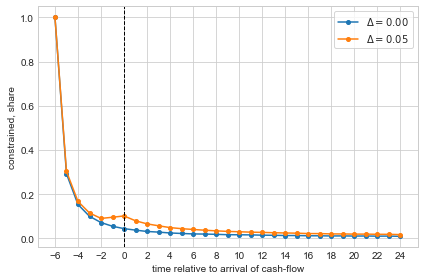

In [6]:
model = do_model('baseline',LOAD)

# Perfect forsight

solving model with Ndelta=1 and Ntau=1

  50: max_abs_diff =   0.05213480 (elapsed:   0.0 secs)
 100: max_abs_diff =   0.02525943 (elapsed:   0.1 secs)
 150: max_abs_diff =   0.01746993 (elapsed:   0.1 secs)
 200: max_abs_diff =   0.01365132 (elapsed:   0.2 secs)
 250: max_abs_diff =   0.01135920 (elapsed:   0.2 secs)
 300: max_abs_diff =   0.00982001 (elapsed:   0.3 secs)
 350: max_abs_diff =   0.00870657 (elapsed:   0.3 secs)
 400: max_abs_diff =   0.00785771 (elapsed:   0.4 secs)
 450: max_abs_diff =   0.00718341 (elapsed:   0.4 secs)
 500: max_abs_diff =   0.00663078 (elapsed:   0.5 secs)
 550: max_abs_diff =   0.00616583 (elapsed:   0.5 secs)
 600: max_abs_diff =   0.00576663 (elapsed:   0.6 secs)
 650: max_abs_diff =   0.00541854 (elapsed:   0.6 secs)
 700: max_abs_diff =   0.00511104 (elapsed:   0.7 secs)
 750: max_abs_diff =   0.00483613 (elapsed:   0.7 secs)
 800: max_abs_diff =   0.00458750 (elapsed:   0.8 secs)
 850: max_abs_diff =   0.00436046 (elapsed:   0.8 secs)
 900: ma

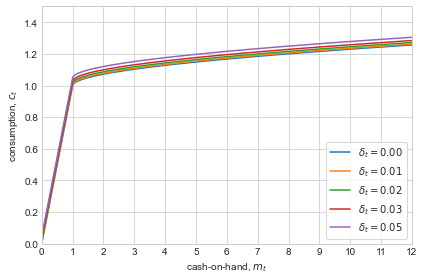

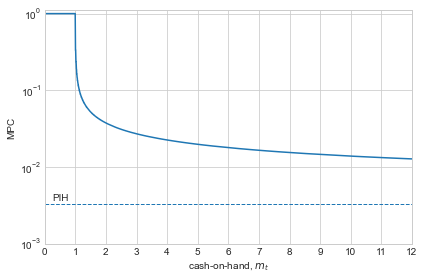

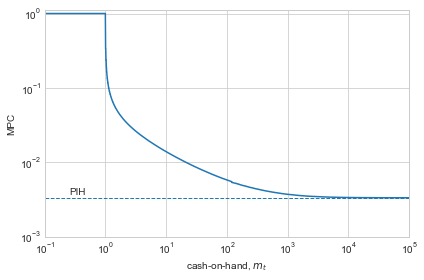

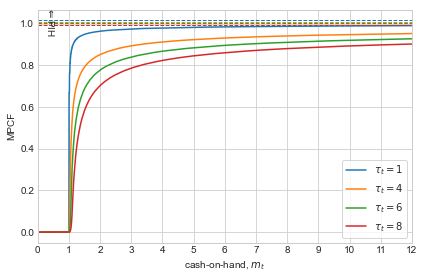

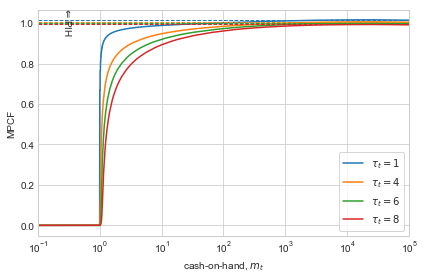

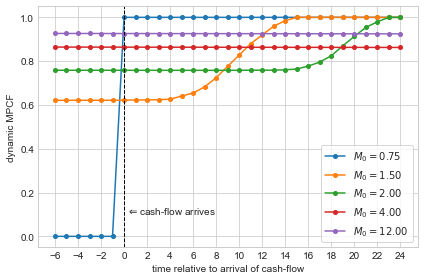

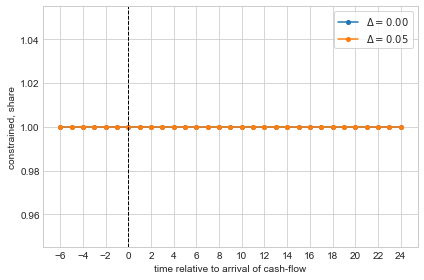

In [7]:
par = {}
par['sigma_psi'] = 0.0
par['sigma_xi'] = 0.0

model_PF = do_model('PF',LOAD_PF,postfix='_PF',par=par)

# Varying $\zeta$

In [8]:
def model_loop(basename,key,vals,basemodel,LOAD):
    
    models = []
    for i,value in enumerate(vals):
    
        print(f'{key} = {value}\n')
          
        par = {key:value}
    
        # a. setup
        models.append(MPCFClass(name=f'{basename}{i}',load=LOAD,par=par))
        
        if type(LOAD) == list:
            LOAD_ = LOAD[i]
        else:
            LOAD_ = LOAD
        
        if not LOAD_:

            # b. solve
            if i == 0:
                models[i].solve_with_c0(basemodel.sol.c[0,:,:])
            else:
                models[i].solve_with_c0(models[i-1].sol.c[0,:,:])

            # c. save
            models[i].save()
        
        # d. figures
        postfix=f'_{basename}{i}'
        figs.MPCF(models[i],postfix=postfix,savefig=True)
        figs.simulate(models[i],postfix=postfix,savefig=True)
        
        plt.show()
        print('')

zeta = 0.9991628226408794

  50: max_abs_diff =   0.00007105 (elapsed:   5.2 secs)
 100: max_abs_diff =   0.00005724 (elapsed:  10.5 secs)
 150: max_abs_diff =   0.00004634 (elapsed:  19.8 secs)
 200: max_abs_diff =   0.00003760 (elapsed:  24.9 secs)
 250: max_abs_diff =   0.00003055 (elapsed:  30.0 secs)
 300: max_abs_diff =   0.00002483 (elapsed:  35.4 secs)
 350: max_abs_diff =   0.00002019 (elapsed:  40.6 secs)
 400: max_abs_diff =   0.00001643 (elapsed:  45.9 secs)
 450: max_abs_diff =   0.00001336 (elapsed:  51.0 secs)
 500: max_abs_diff =   0.00001088 (elapsed:  56.2 secs)
 550: max_abs_diff =   0.00000885 (elapsed:  61.4 secs)
 600: max_abs_diff =   0.00000721 (elapsed:  66.6 secs)
 650: max_abs_diff =   0.00000587 (elapsed:  71.8 secs)
 700: max_abs_diff =   0.00000478 (elapsed:  76.9 secs)
 750: max_abs_diff =   0.00000389 (elapsed:  82.0 secs)
 800: max_abs_diff =   0.00000317 (elapsed:  87.0 secs)
 850: max_abs_diff =   0.00000258 (elapsed:  92.1 secs)
 900: max_abs_diff = 

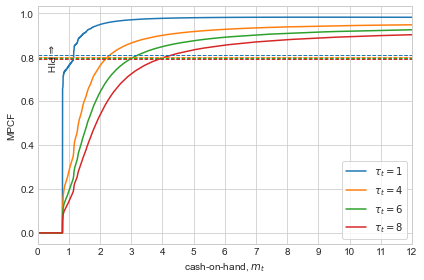

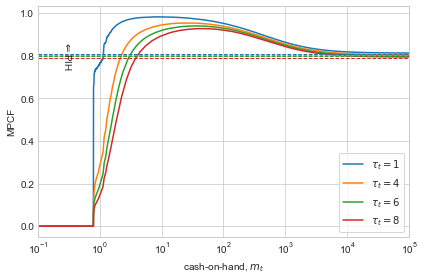

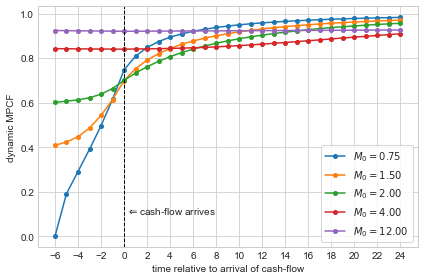

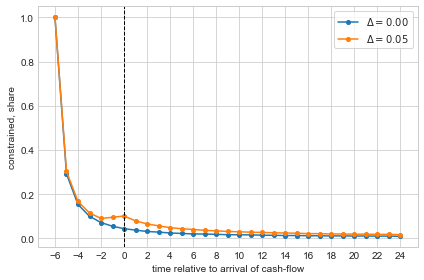


zeta = 0.9957346812224394

  50: max_abs_diff =   0.00021018 (elapsed:  10.0 secs)
 100: max_abs_diff =   0.00013943 (elapsed:  15.5 secs)
 150: max_abs_diff =   0.00009375 (elapsed:  21.0 secs)
 200: max_abs_diff =   0.00006347 (elapsed:  26.0 secs)
 250: max_abs_diff =   0.00004315 (elapsed:  31.0 secs)
 300: max_abs_diff =   0.00002943 (elapsed:  36.0 secs)
 350: max_abs_diff =   0.00002012 (elapsed:  40.9 secs)
 400: max_abs_diff =   0.00001378 (elapsed:  45.8 secs)
 450: max_abs_diff =   0.00000945 (elapsed:  50.8 secs)
 500: max_abs_diff =   0.00000648 (elapsed:  55.8 secs)
 550: max_abs_diff =   0.00000444 (elapsed:  60.8 secs)
 600: max_abs_diff =   0.00000305 (elapsed:  65.7 secs)
 650: max_abs_diff =   0.00000209 (elapsed:  70.7 secs)
 700: max_abs_diff =   0.00000143 (elapsed:  75.6 secs)
-> convergence achieved


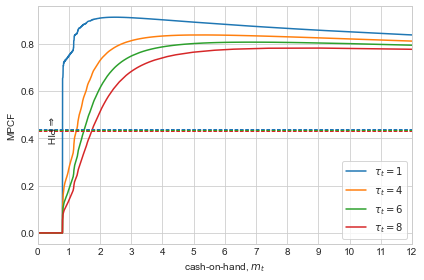

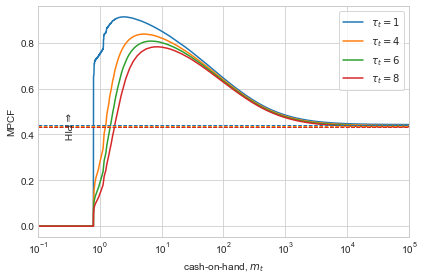

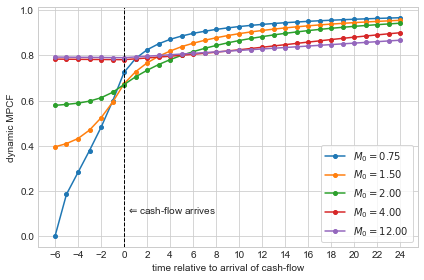

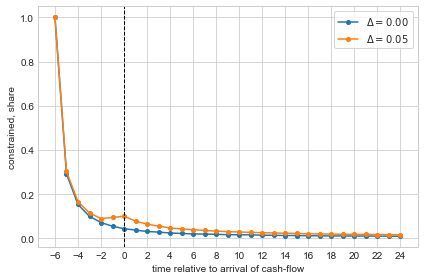


zeta = 0.9912583890453033

  50: max_abs_diff =   0.00015797 (elapsed:   9.1 secs)
 100: max_abs_diff =   0.00007754 (elapsed:  14.1 secs)
 150: max_abs_diff =   0.00003990 (elapsed:  19.1 secs)
 200: max_abs_diff =   0.00002091 (elapsed:  24.0 secs)
 250: max_abs_diff =   0.00001108 (elapsed:  29.1 secs)
 300: max_abs_diff =   0.00000591 (elapsed:  34.1 secs)
 350: max_abs_diff =   0.00000317 (elapsed:  39.0 secs)
 400: max_abs_diff =   0.00000171 (elapsed:  44.0 secs)
-> convergence achieved


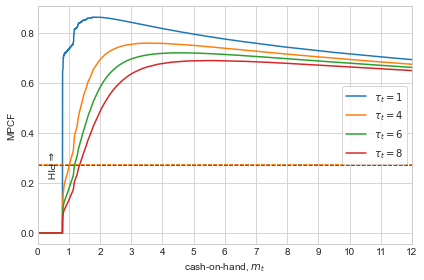

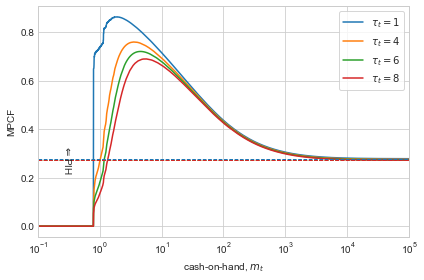

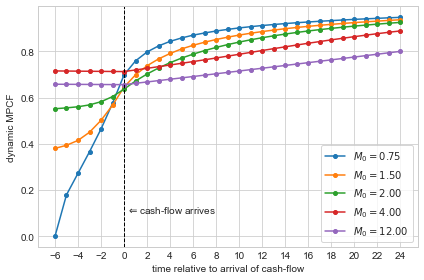

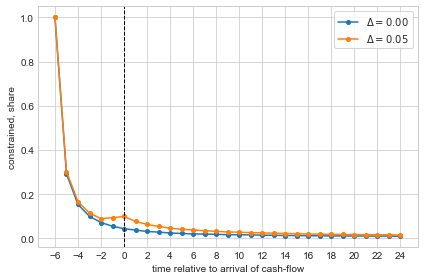


zeta = 0.9815765298737517

  50: max_abs_diff =   0.00016628 (elapsed:   9.1 secs)
 100: max_abs_diff =   0.00004711 (elapsed:  14.1 secs)
 150: max_abs_diff =   0.00001426 (elapsed:  19.1 secs)
 200: max_abs_diff =   0.00000446 (elapsed:  24.2 secs)
 250: max_abs_diff =   0.00000142 (elapsed:  29.3 secs)
-> convergence achieved


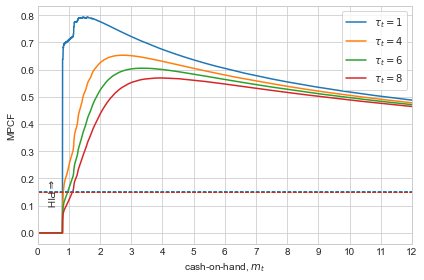

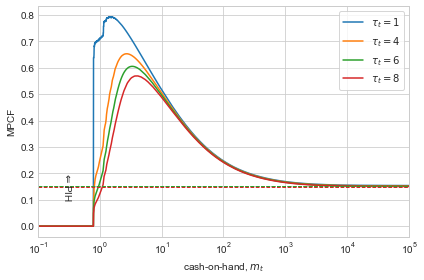

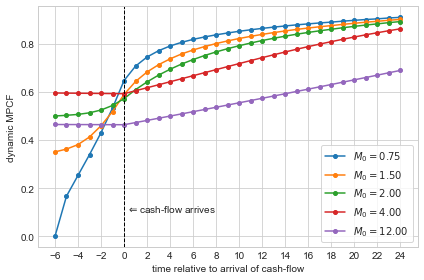

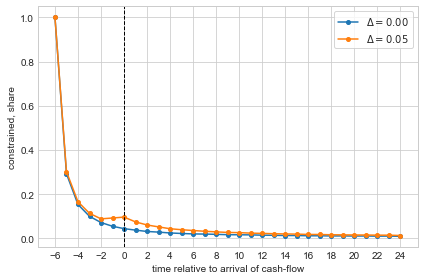

In [9]:
zetas = [0.99**(1/12),0.95**(1/12),0.90**(1/12),0.80**(1/12)]
model_loop('pers','zeta',zetas,model,LOAD_PERS)

# Varying $\rho$

rho = 1.5

  50: max_abs_diff =   0.00634387 (elapsed:   9.4 secs)
 100: max_abs_diff =   0.00537305 (elapsed:  14.5 secs)
 150: max_abs_diff =   0.00454970 (elapsed:  19.5 secs)
 200: max_abs_diff =   0.00385178 (elapsed:  24.6 secs)
 250: max_abs_diff =   0.00326044 (elapsed:  29.7 secs)
 300: max_abs_diff =   0.00275960 (elapsed:  34.7 secs)
 350: max_abs_diff =   0.00233554 (elapsed:  39.8 secs)
 400: max_abs_diff =   0.00197662 (elapsed:  44.9 secs)
 450: max_abs_diff =   0.00167289 (elapsed:  50.0 secs)
 500: max_abs_diff =   0.00141594 (elapsed:  55.0 secs)
 550: max_abs_diff =   0.00119861 (elapsed:  60.1 secs)
 600: max_abs_diff =   0.00101483 (elapsed:  65.2 secs)
 650: max_abs_diff =   0.00085945 (elapsed:  70.3 secs)
 700: max_abs_diff =   0.00072811 (elapsed:  75.4 secs)
 750: max_abs_diff =   0.00061710 (elapsed:  80.5 secs)
 800: max_abs_diff =   0.00052329 (elapsed:  85.5 secs)
 850: max_abs_diff =   0.00044404 (elapsed:  90.6 secs)
 900: max_abs_diff =   0.00037709 (el

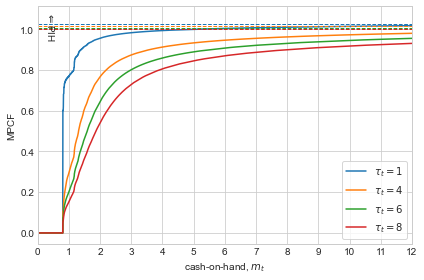

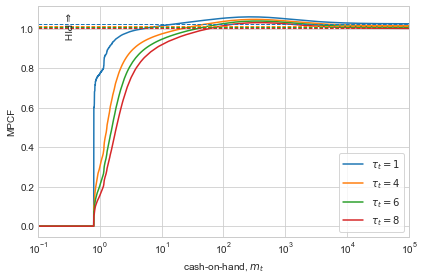

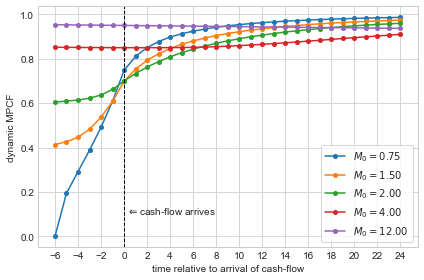

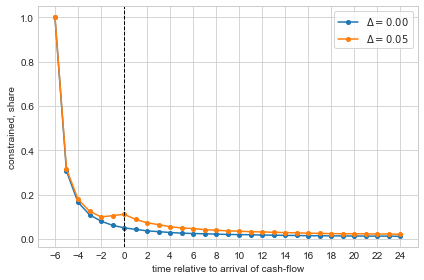


rho = 3.0

  50: max_abs_diff =   0.01272476 (elapsed:   9.2 secs)
 100: max_abs_diff =   0.01074651 (elapsed:  14.2 secs)
 150: max_abs_diff =   0.00908109 (elapsed:  19.1 secs)
 200: max_abs_diff =   0.00767771 (elapsed:  24.1 secs)
 250: max_abs_diff =   0.00649419 (elapsed:  29.1 secs)
 300: max_abs_diff =   0.00549543 (elapsed:  34.1 secs)
 350: max_abs_diff =   0.00465214 (elapsed:  39.0 secs)
 400: max_abs_diff =   0.00393981 (elapsed:  44.0 secs)
 450: max_abs_diff =   0.00333787 (elapsed:  49.0 secs)
 500: max_abs_diff =   0.00282908 (elapsed:  53.9 secs)
 550: max_abs_diff =   0.00239894 (elapsed:  58.9 secs)
 600: max_abs_diff =   0.00203521 (elapsed:  63.9 secs)
 650: max_abs_diff =   0.00172762 (elapsed:  68.9 secs)
 700: max_abs_diff =   0.00146747 (elapsed:  73.9 secs)
 750: max_abs_diff =   0.00124744 (elapsed:  78.8 secs)
 800: max_abs_diff =   0.00106133 (elapsed:  83.8 secs)
 850: max_abs_diff =   0.00090389 (elapsed:  88.7 secs)
 900: max_abs_diff =   0.00077071 (e

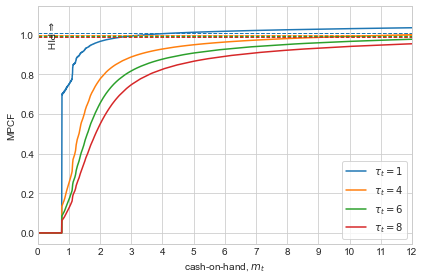

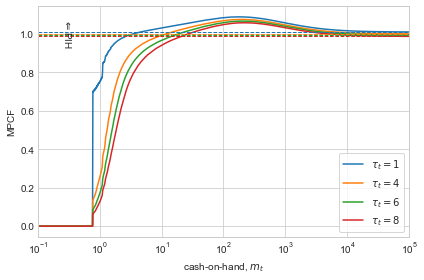

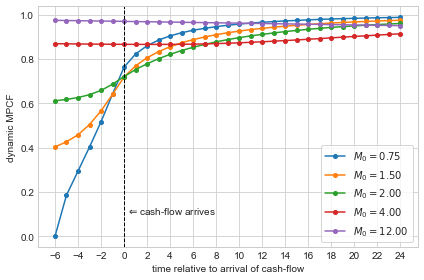

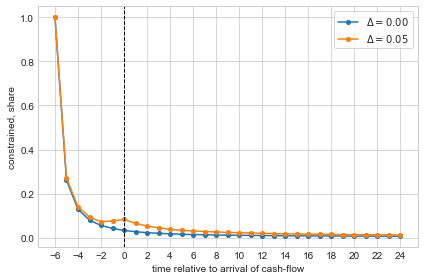


rho = 4.0

  50: max_abs_diff =   0.00315535 (elapsed:   9.0 secs)
 100: max_abs_diff =   0.00267412 (elapsed:  13.9 secs)
 150: max_abs_diff =   0.00226692 (elapsed:  18.9 secs)
 200: max_abs_diff =   0.00192230 (elapsed:  23.8 secs)
 250: max_abs_diff =   0.00163061 (elapsed:  28.7 secs)
 300: max_abs_diff =   0.00138369 (elapsed:  33.7 secs)
 350: max_abs_diff =   0.00117466 (elapsed:  38.6 secs)
 400: max_abs_diff =   0.00099771 (elapsed:  43.6 secs)
 450: max_abs_diff =   0.00084792 (elapsed:  48.5 secs)
 500: max_abs_diff =   0.00072113 (elapsed:  53.5 secs)
 550: max_abs_diff =   0.00061382 (elapsed:  58.4 secs)
 600: max_abs_diff =   0.00052301 (elapsed:  63.4 secs)
 650: max_abs_diff =   0.00044616 (elapsed:  68.3 secs)
 700: max_abs_diff =   0.00038114 (elapsed:  73.3 secs)
 750: max_abs_diff =   0.00032614 (elapsed:  78.2 secs)
 800: max_abs_diff =   0.00027962 (elapsed:  83.2 secs)
 850: max_abs_diff =   0.00024026 (elapsed:  88.1 secs)
 900: max_abs_diff =   0.00020697 (e

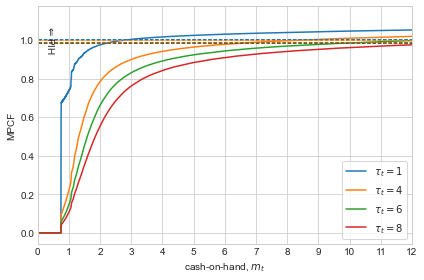

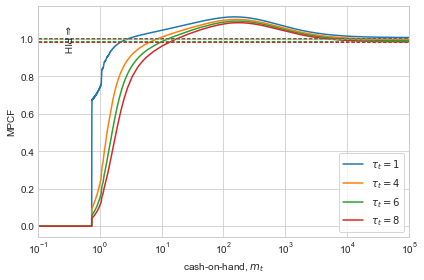

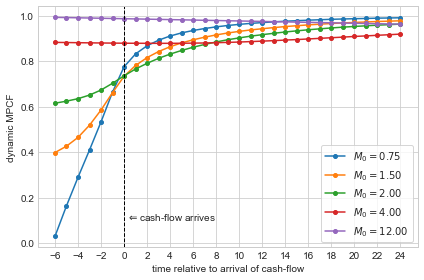

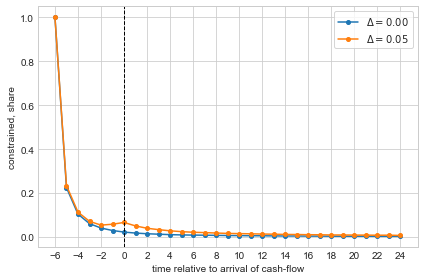

In [10]:
rhos = [1.5,3.0,4.0]
model_loop('rho','rho',rhos,model,LOAD_RHO)

# Varying $\beta$

beta = 0.9957346812224394

  50: max_abs_diff =   0.12652217 (elapsed:   9.1 secs)
 100: max_abs_diff =   0.10837492 (elapsed:  14.0 secs)
 150: max_abs_diff =   0.09232988 (elapsed:  18.8 secs)
 200: max_abs_diff =   0.07829784 (elapsed:  23.8 secs)
 250: max_abs_diff =   0.06613794 (elapsed:  28.6 secs)
 300: max_abs_diff =   0.05568053 (elapsed:  33.5 secs)
 350: max_abs_diff =   0.04674437 (elapsed:  38.4 secs)
 400: max_abs_diff =   0.03914860 (elapsed:  43.3 secs)
 450: max_abs_diff =   0.03272067 (elapsed:  48.3 secs)
 500: max_abs_diff =   0.02730104 (elapsed:  53.2 secs)
 550: max_abs_diff =   0.02274553 (elapsed:  58.2 secs)
 600: max_abs_diff =   0.01892612 (elapsed:  63.1 secs)
 650: max_abs_diff =   0.01573067 (elapsed:  68.0 secs)
 700: max_abs_diff =   0.01306196 (elapsed:  72.9 secs)
 750: max_abs_diff =   0.01083645 (elapsed:  77.9 secs)
 800: max_abs_diff =   0.00898283 (elapsed:  82.7 secs)
 850: max_abs_diff =   0.00744055 (elapsed:  87.6 secs)
 900: max_abs_diff = 

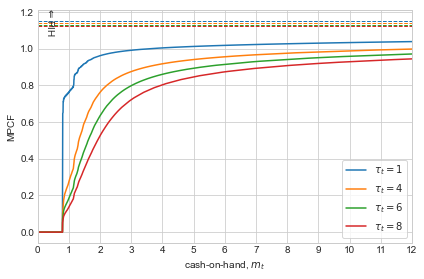

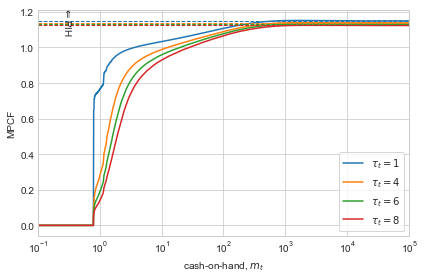

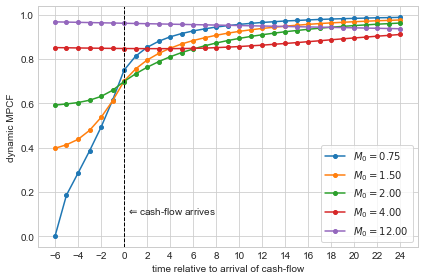

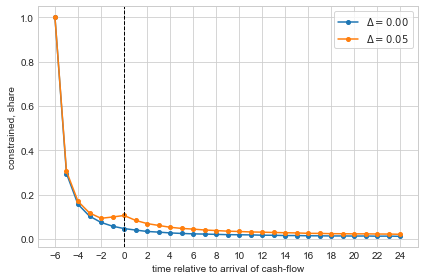


beta = 0.994856987168177

  50: max_abs_diff =   0.14134204 (elapsed:   9.4 secs)
 100: max_abs_diff =   0.11833707 (elapsed:  14.4 secs)
 150: max_abs_diff =   0.09849153 (elapsed:  19.3 secs)
 200: max_abs_diff =   0.08156979 (elapsed:  24.3 secs)
 250: max_abs_diff =   0.06727788 (elapsed:  29.3 secs)
 300: max_abs_diff =   0.05530070 (elapsed:  34.2 secs)
 350: max_abs_diff =   0.04532689 (elapsed:  39.4 secs)
 400: max_abs_diff =   0.03706425 (elapsed:  44.6 secs)
 450: max_abs_diff =   0.03024804 (elapsed:  49.8 secs)
 500: max_abs_diff =   0.02464432 (elapsed:  54.8 secs)
 550: max_abs_diff =   0.02005028 (elapsed:  59.8 secs)
 600: max_abs_diff =   0.01629257 (elapsed:  65.0 secs)
 650: max_abs_diff =   0.01322463 (elapsed:  70.2 secs)
 700: max_abs_diff =   0.01072366 (elapsed:  75.2 secs)
 750: max_abs_diff =   0.00868741 (elapsed:  80.1 secs)
 800: max_abs_diff =   0.00703122 (elapsed:  85.1 secs)
 850: max_abs_diff =   0.00568532 (elapsed:  90.1 secs)
 900: max_abs_diff = 

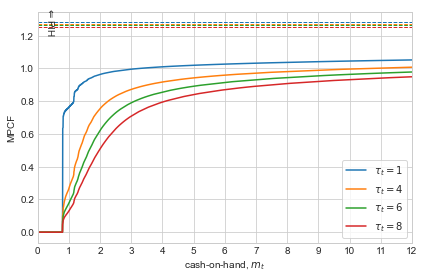

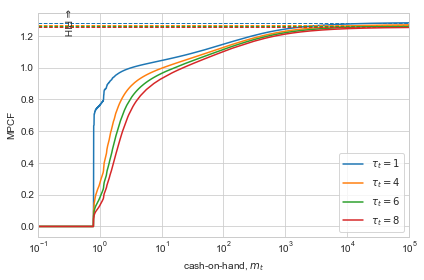

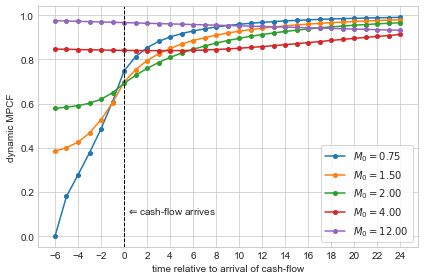

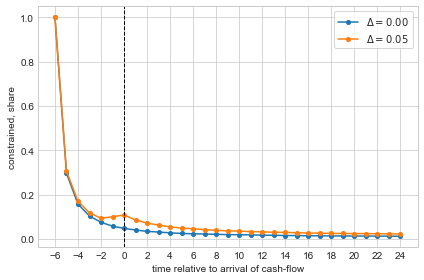


beta = 0.9939706919338731

  50: max_abs_diff =   0.15593808 (elapsed:   9.2 secs)
 100: max_abs_diff =   0.12758246 (elapsed:  14.0 secs)
 150: max_abs_diff =   0.10371688 (elapsed:  18.9 secs)
 200: max_abs_diff =   0.08387583 (elapsed:  23.8 secs)
 250: max_abs_diff =   0.06754210 (elapsed:  28.7 secs)
 300: max_abs_diff =   0.05420095 (elapsed:  33.6 secs)
 350: max_abs_diff =   0.04337218 (elapsed:  38.6 secs)
 400: max_abs_diff =   0.03462649 (elapsed:  43.6 secs)
 450: max_abs_diff =   0.02759123 (elapsed:  48.7 secs)
 500: max_abs_diff =   0.02194979 (elapsed:  53.7 secs)
 550: max_abs_diff =   0.01743744 (elapsed:  58.9 secs)
 600: max_abs_diff =   0.01383547 (elapsed:  63.8 secs)
 650: max_abs_diff =   0.01096484 (elapsed:  69.0 secs)
 700: max_abs_diff =   0.00868001 (elapsed:  74.0 secs)
 750: max_abs_diff =   0.00686336 (elapsed:  78.9 secs)
 800: max_abs_diff =   0.00542020 (elapsed:  83.9 secs)
 850: max_abs_diff =   0.00427457 (elapsed:  88.8 secs)
 900: max_abs_diff =

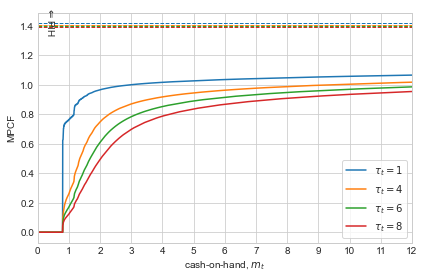

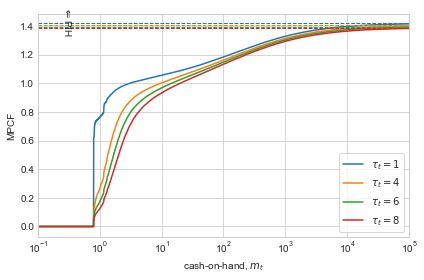

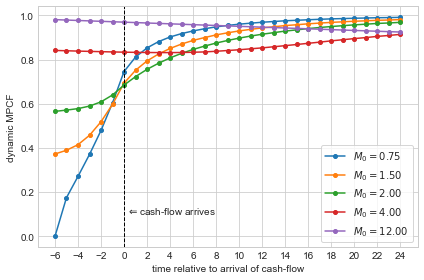

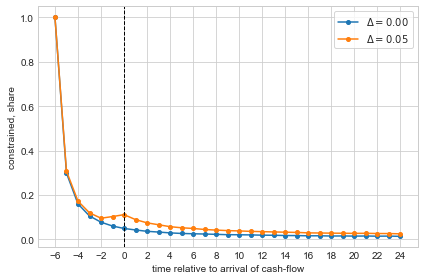

In [11]:
betas = [0.95**(1/12),0.94**(1/12),0.93**(1/12)]
model_loop('beta','beta',betas,model,LOAD_BETA)

# Varying the transitory variance

sigma_xi = 0.22360679774997896

  50: max_abs_diff =   0.00021287 (elapsed:   9.2 secs)
 100: max_abs_diff =   0.00010330 (elapsed:  14.1 secs)
 150: max_abs_diff =   0.00006479 (elapsed:  18.9 secs)
 200: max_abs_diff =   0.00004442 (elapsed:  23.8 secs)
 250: max_abs_diff =   0.00003191 (elapsed:  28.8 secs)
 300: max_abs_diff =   0.00002369 (elapsed:  33.7 secs)
 350: max_abs_diff =   0.00001702 (elapsed:  38.6 secs)
 400: max_abs_diff =   0.00001257 (elapsed:  43.5 secs)
 450: max_abs_diff =   0.00000983 (elapsed:  48.4 secs)
 500: max_abs_diff =   0.00000795 (elapsed:  53.3 secs)
 550: max_abs_diff =   0.00000660 (elapsed:  58.3 secs)
 600: max_abs_diff =   0.00000557 (elapsed:  63.2 secs)
 650: max_abs_diff =   0.00000476 (elapsed:  68.1 secs)
 700: max_abs_diff =   0.00000412 (elapsed:  73.0 secs)
 750: max_abs_diff =   0.00000360 (elapsed:  77.9 secs)
 800: max_abs_diff =   0.00000316 (elapsed:  82.8 secs)
 850: max_abs_diff =   0.00000281 (elapsed:  87.7 secs)
 900: max_abs_di

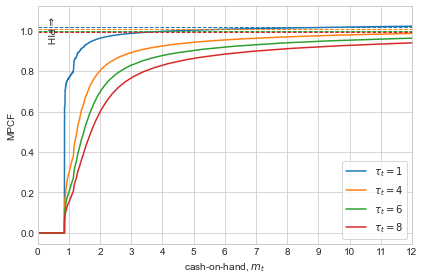

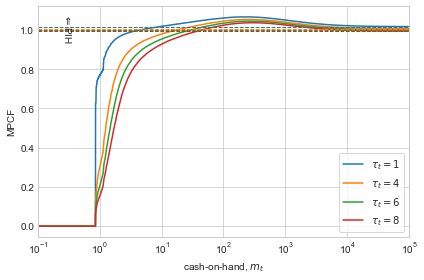

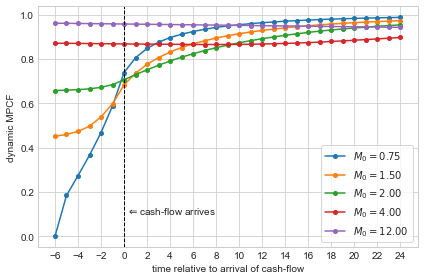

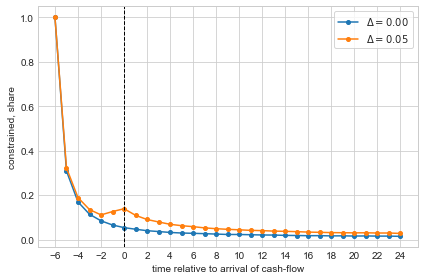


sigma_xi = 0.1

  50: max_abs_diff =   0.00038038 (elapsed:   9.5 secs)
 100: max_abs_diff =   0.00018377 (elapsed:  14.6 secs)
 150: max_abs_diff =   0.00011015 (elapsed:  19.7 secs)
 200: max_abs_diff =   0.00007145 (elapsed:  24.7 secs)
 250: max_abs_diff =   0.00004878 (elapsed:  29.8 secs)
 300: max_abs_diff =   0.00003471 (elapsed:  34.8 secs)
 350: max_abs_diff =   0.00002419 (elapsed:  39.9 secs)
 400: max_abs_diff =   0.00001712 (elapsed:  44.9 secs)
 450: max_abs_diff =   0.00001307 (elapsed:  50.0 secs)
 500: max_abs_diff =   0.00001040 (elapsed:  55.1 secs)
 550: max_abs_diff =   0.00000853 (elapsed:  60.2 secs)
 600: max_abs_diff =   0.00000714 (elapsed:  65.2 secs)
 650: max_abs_diff =   0.00000606 (elapsed:  70.3 secs)
 700: max_abs_diff =   0.00000521 (elapsed:  75.4 secs)
 750: max_abs_diff =   0.00000453 (elapsed:  80.4 secs)
 800: max_abs_diff =   0.00000397 (elapsed:  85.5 secs)
 850: max_abs_diff =   0.00000350 (elapsed:  90.6 secs)
 900: max_abs_diff =   0.000003

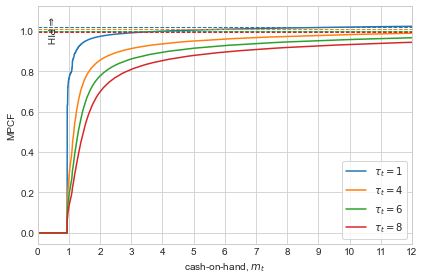

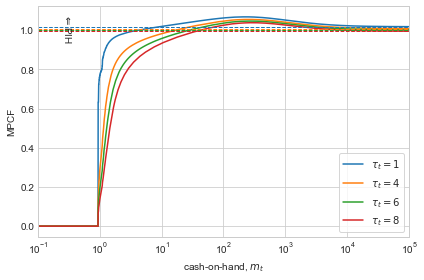

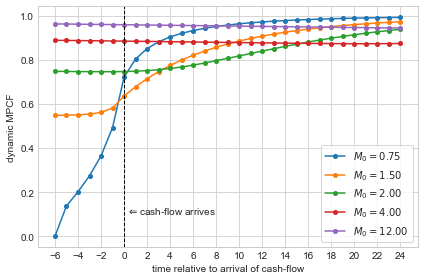

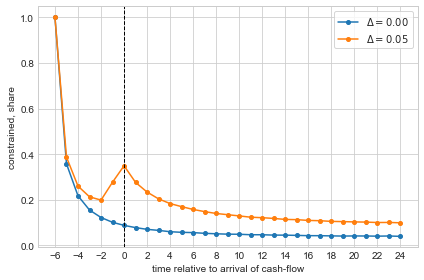


sigma_xi = 0.03162277660168379

  50: max_abs_diff =   0.00026710 (elapsed:   9.3 secs)
 100: max_abs_diff =   0.00011587 (elapsed:  14.4 secs)
 150: max_abs_diff =   0.00006086 (elapsed:  19.4 secs)
 200: max_abs_diff =   0.00003557 (elapsed:  24.4 secs)
 250: max_abs_diff =   0.00002258 (elapsed:  29.4 secs)
 300: max_abs_diff =   0.00001528 (elapsed:  34.4 secs)
 350: max_abs_diff =   0.00001020 (elapsed:  39.5 secs)
 400: max_abs_diff =   0.00000698 (elapsed:  44.5 secs)
 450: max_abs_diff =   0.00000522 (elapsed:  49.5 secs)
 500: max_abs_diff =   0.00000410 (elapsed:  54.6 secs)
 550: max_abs_diff =   0.00000333 (elapsed:  59.6 secs)
 600: max_abs_diff =   0.00000277 (elapsed:  64.7 secs)
 650: max_abs_diff =   0.00000234 (elapsed:  69.7 secs)
 700: max_abs_diff =   0.00000200 (elapsed:  74.7 secs)
 750: max_abs_diff =   0.00000173 (elapsed:  79.7 secs)
 800: max_abs_diff =   0.00000151 (elapsed:  84.8 secs)
 850: max_abs_diff =   0.00000133 (elapsed:  89.8 secs)
 900: max_abs_d

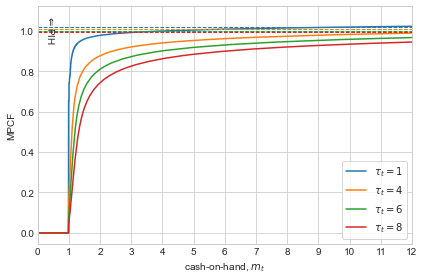

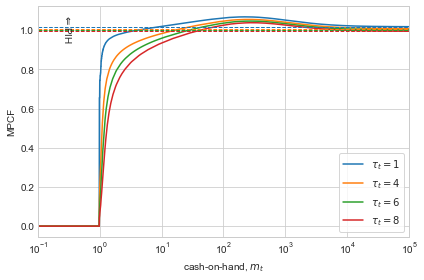

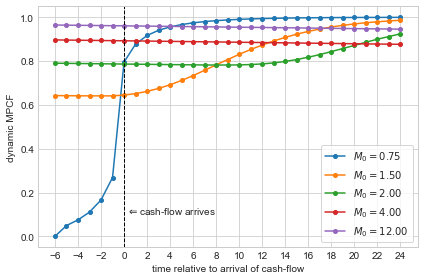

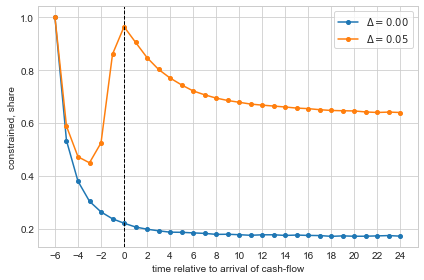

In [12]:
sigma_xis = [np.sqrt(0.05),np.sqrt(0.01),np.sqrt(0.001)]
model_loop('sigma_xi','sigma_xi',sigma_xis,model,LOAD_SIGMA_XI)

# Annual

solving model with Ndelta=1 and Ntau=1

  50: max_abs_diff =   0.03606258 (elapsed:   4.5 secs)
 100: max_abs_diff =   0.01442463 (elapsed:   4.6 secs)
 150: max_abs_diff =   0.00731169 (elapsed:   4.7 secs)
 200: max_abs_diff =   0.00149630 (elapsed:   4.8 secs)
 250: max_abs_diff =   0.00005572 (elapsed:   4.9 secs)
 300: max_abs_diff =   0.00000077 (elapsed:   5.0 secs)
-> convergence achieved

solving full model

  50: max_abs_diff =   0.00063437 (elapsed:   2.5 secs)
 100: max_abs_diff =   0.00008384 (elapsed:   5.1 secs)
 150: max_abs_diff =   0.00001251 (elapsed:   7.6 secs)
 200: max_abs_diff =   0.00000177 (elapsed:  10.2 secs)
-> convergence achieved



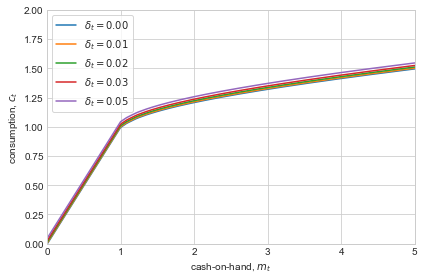

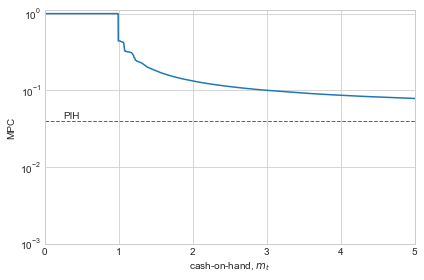

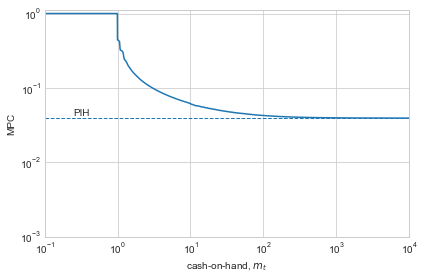

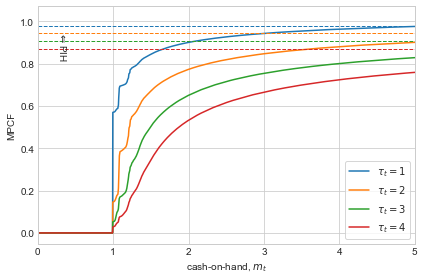

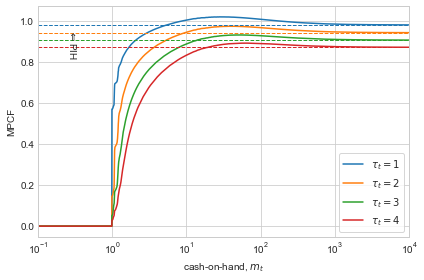

In [13]:
# a. setup
par = {}
par['beta'] = 0.96
par['R'] = 1.04
par['G'] = 1.03
par['sigma_psi'] = np.sqrt(0.0054)
par['sigma_xi'] = np.sqrt(0.0072)

par['Ndelta'] = 50
par['Nm'] = 10_000
par['m_mid'] = 10.0
par['m_max'] = 10_000.0
par['Na'] = 5_000
par['a_mid'] = par['m_mid']
par['a_max'] = par['m_max']

model_annual = MPCFClass(name='annual',load=LOAD_ANNUAL,par=par)

if not LOAD_ANNUAL:

    # b. solve
    model_annual.solve()

    # c. save
    model_annual.save()
    
    print('')

# d. figures
postfix = '_annual'
figs.cfunc(model_annual,m_max=5,c_max=2,postfix=postfix,savefig=True)
figs.MPC(model_annual,m_max=5,postfix=postfix,savefig=True)
figs.MPCF(model_annual,m_max=5,taus=[1,2,3,4],postfix=postfix,savefig=True)